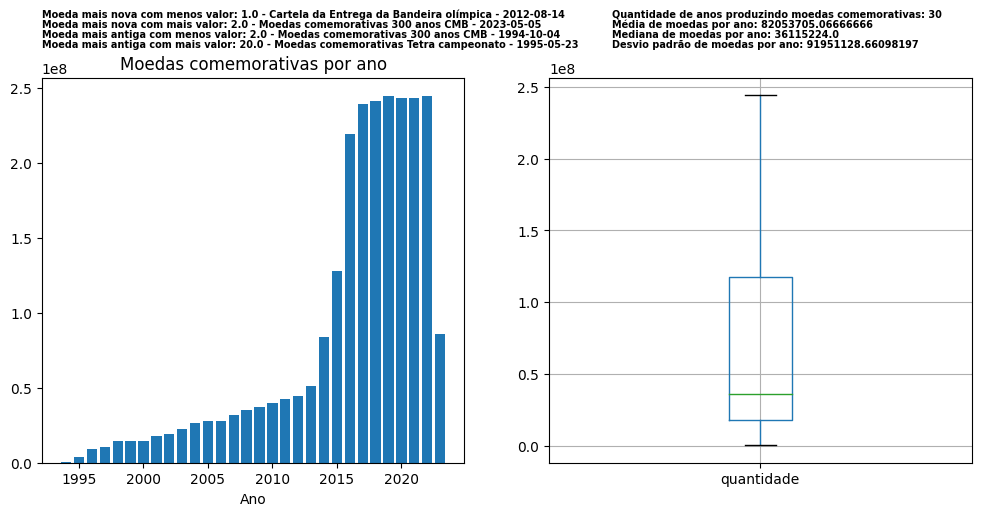

In [33]:
import json
import requests
import pandas as pd
import matplotlib.pyplot
from statistics import median, stdev

url = 'https://olinda.bcb.gov.br/olinda/servico/mecir_moedas_comemorativas/versao/v1/odata/informacoes_diarias?$top=1000000&$format=json&$select=Data,Quantidade,Valor,Categoria,Denominacao'
response = requests.get(url)
data = response.json()

moedas_por_ano = {}
maior_moeda_mais_antiga = {"Denominacao": 0, "Data": "9999-12-31"}
menor_moeda_mais_antiga = {"Denominacao": float('inf'), "Data": "9999-12-31"}
maior_moeda_mais_nova = {"Denominacao": 0, "Data": "0000-00-00"}
menor_moeda_mais_nova = {"Denominacao": float('inf'), "Data": "0000-00-00"}


for item in data['value']:
    data = item['Data']
    ano = item['Data'].split('-')[0]
    quantidade = item['Quantidade']
    categoria = item['Categoria']
    denominacao = float(item['Denominacao'])
    if ano in moedas_por_ano:
        moedas_por_ano[ano] += quantidade
    else:
        moedas_por_ano[ano] = quantidade

    if data < menor_moeda_mais_antiga["Data"]:
        menor_moeda_mais_antiga = {"Data": data, "Denominacao": denominacao, "Categoria": categoria}
    if data > maior_moeda_mais_nova["Data"]:
        maior_moeda_mais_nova = {"Data": data, "Denominacao": denominacao, "Categoria": categoria}
    if denominacao > maior_moeda_mais_antiga["Denominacao"]:
        maior_moeda_mais_antiga = {"Data": data, "Denominacao": denominacao, "Categoria": categoria}
    if denominacao < menor_moeda_mais_nova["Denominacao"]:
        menor_moeda_mais_nova = {"Data": data, "Denominacao": denominacao, "Categoria": categoria}
    

moedas_por_ano_ordenado = {}
for ano in sorted(moedas_por_ano.keys()):
    moedas_por_ano_ordenado[ano] = moedas_por_ano[ano]

lista_moedas_por_ano = [{'ano': ano, 'quantidade': moedas_por_ano_ordenado[ano]} for ano in moedas_por_ano_ordenado]
json_moedas_por_ano = json.dumps(lista_moedas_por_ano)

quantidade_de_anos = len(set([item['ano'] for item in lista_moedas_por_ano]))
soma_das_quantidades = sum([item['quantidade'] for item in lista_moedas_por_ano])
media = soma_das_quantidades / quantidade_de_anos
mediana = median([item['quantidade'] for item in lista_moedas_por_ano])
desvio_padrao = stdev([item['quantidade'] for item in lista_moedas_por_ano])

df = pd.read_json(json_moedas_por_ano)

fig, (ax1, ax2) = matplotlib.pyplot.subplots(ncols=2, figsize=(12, 5))

ax1.bar(df['ano'], df['quantidade'])
ax1.set_xlabel('Ano')
ax1.set_title('Moedas comemorativas por ano')

df.boxplot('quantidade', ax=ax2)

fig.text(0.6, 1, f"Quantidade de anos produzindo moedas comemorativas: {quantidade_de_anos}", fontsize=7, fontweight='bold')
fig.text(0.6, 0.98, f"Média de moedas por ano: {media}", fontsize=7, fontweight='bold')
fig.text(0.6, 0.96, f"Mediana de moedas por ano: {mediana}", fontsize=7, fontweight='bold')
fig.text(0.6, 0.94, f"Desvio padrão de moedas por ano: {desvio_padrao}", fontsize=7, fontweight='bold')
fig.text(0.125, 0.94, f"Moeda mais antiga com mais valor: {maior_moeda_mais_antiga['Denominacao']} - {maior_moeda_mais_antiga['Categoria']} - {maior_moeda_mais_antiga['Data']}", fontsize=7, fontweight='bold')
fig.text(0.125, 0.96, f"Moeda mais antiga com menos valor: {menor_moeda_mais_antiga['Denominacao']} - {menor_moeda_mais_antiga['Categoria']} - {menor_moeda_mais_antiga['Data']}", fontsize=7, fontweight='bold')
fig.text(0.125, 0.98, f"Moeda mais nova com mais valor: {maior_moeda_mais_nova['Denominacao']} - {maior_moeda_mais_nova['Categoria']} - {maior_moeda_mais_nova['Data']}", fontsize=7, fontweight='bold')
fig.text(0.125, 1,    f"Moeda mais nova com menos valor: {menor_moeda_mais_nova['Denominacao']} - {menor_moeda_mais_nova['Categoria']} - {menor_moeda_mais_nova['Data']}", fontsize=7, fontweight='bold')

matplotlib.pyplot.show()